# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Alvin Rahmatullah Putra Pratama
- **Email:** marpfirst@gmail.com
- **ID Dicoding:** marpfirst

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan tingkat polusi udara di semua stasiun?
-Bagaimana tingkat hujan berhubungan dengan perubahan suhu dan tekanan udara?
-Bagaimana pola curah hujan mempengaruhi tingkat partikel di udara?
-Adakah arah angin dominan yang berkaitan dengan peningkatan tingkat polusi udara?
-Bagaimana kecepatan angin (WSPM) berubah sepanjang waktu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

## Data Wrangling

### Gathering Data

**Memuat tabel Aotizhongxin**

Data pertama yang harus kita muat ialah data dari tabel Aotizhongxin.

Berikut merupakan kode yang dapat digunakan untuk membuat tabel Aotizhongxin menjadi sebuah DataFrame bernama Aotizhongxin_df.


In [2]:
# Load the dataset
Aotizhongxin = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
Changping = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
Dingling = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
Dongsi = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
Guanyuan = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
Gucheng = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
Huairou = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
Nongzhanguan = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
Shunyi = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
Tiantan = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
Wanliu = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
Wanshouxigong = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")


Menyatukan Semua dataset menjadi 1 menggunakan method concat

In [3]:
# Merge the DataFrames
merged_df = pd.concat([Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong], ignore_index=True)

# Display the merged DataFrame
print(merged_df.tail())

           No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  \
420763  35060  2017      2   28    19   11.0  32.0  3.0  24.0  400.0  72.0   
420764  35061  2017      2   28    20   13.0  32.0  3.0  41.0  500.0  50.0   
420765  35062  2017      2   28    21   14.0  28.0  4.0  38.0  500.0  54.0   
420766  35063  2017      2   28    22   12.0  23.0  4.0  30.0  400.0  59.0   
420767  35064  2017      2   28    23   13.0  19.0  4.0  38.0  600.0  49.0   

        TEMP    PRES  DEWP  RAIN   wd  WSPM        station  
420763  12.5  1013.5 -16.2   0.0   NW   2.4  Wanshouxigong  
420764  11.6  1013.6 -15.1   0.0  WNW   0.9  Wanshouxigong  
420765  10.8  1014.2 -13.3   0.0   NW   1.1  Wanshouxigong  
420766  10.5  1014.4 -12.9   0.0  NNW   1.2  Wanshouxigong  
420767   8.6  1014.1 -15.9   0.0  NNE   1.3  Wanshouxigong  


### Assessing Data

**Menilai tabel merged_df**

Menilai Data merged_df. Memeriksa tipe data dari tiap kolom yang terdapat dalam merged_df.

Proses menggunakan method info() seperti dengan kode berikut.

In [4]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Mencari variabel yang tidak memiliki nilai didalamnya

In [5]:
merged_df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

Memeriksa duplikasi data yang terdapat dalam merged_df.

Menggunakan method duplicated().sum() seperti dengan kode berikut.

In [6]:
print("Jumlah duplikasi: ",merged_df.duplicated().sum())

Jumlah duplikasi:  0


Menampilkan  parameter statistik dari masing-masing data menggunakan method describe() seperti dengan kode berikut.

In [7]:
merged_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


### Cleaning Data

Menghilangkan kolom variabel No. Hal ini dilakukan karena data yang digunakan lebih dari 1 stasiun

**Menangani missing value**

menangani missing values dengan menggunakan metode imputation.


In [8]:
merged_df = merged_df.drop(columns = {'No'})
merged_df.head(5)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


Berdasarkan hasil sebelumnya, baris data tersebut masih mengandung banyak informasi penting. Oleh karena itu, saya akan menggunakan metode fillna() untuk mengganti missing value dengan nilai tertentu

In [9]:
merged_df.fillna(method = "ffill", inplace=True)

melakukan mengecekan variabel yang kosong sebelumnya menggunakan method isna().sum()

In [10]:
merged_df.isna().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Berdasarkan hasil diatas, proses pembersihan missing value telah berhasil

## Exploratory Data Analysis (EDA)

In [11]:
merged_df.head(10)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
5,2013,3,1,5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin
6,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
7,2013,3,1,7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin
8,2013,3,1,8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin
9,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin


### Korelasi antara Tingkat Polusi dengan suhu dan tekanan udara
Pada eksplorasi ini dilakukan perhitungan korelasi dengan menggunakan metode korelasi pearson


In [12]:
# Pengambilan dataframe untuk korelasi
correlation_df = merged_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES']].copy()

# Menghitung korelasi menggunakan metode Pearson
correlation_matrix = correlation_df.corr(method='pearson')

# Menampilkan matriks korelasi
print("Matriks Korelasi (Metode Pearson):")
print(correlation_matrix)


Matriks Korelasi (Metode Pearson):
          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.876213  0.469207  0.654277  0.773015 -0.144707 -0.130454   
PM10   0.876213  1.000000  0.453617  0.639971  0.686354 -0.107736 -0.096779   
SO2    0.469207  0.453617  1.000000  0.476857  0.514696 -0.162745 -0.316100   
NO2    0.654277  0.639971  0.476857  1.000000  0.682958 -0.454530 -0.269755   
CO     0.773015  0.686354  0.514696  0.682958  1.000000 -0.302272 -0.328008   
O3    -0.144707 -0.107736 -0.162745 -0.454530 -0.302272  1.000000  0.582970   
TEMP  -0.130454 -0.096779 -0.316100 -0.269755 -0.328008  0.582970  1.000000   
PRES   0.019145 -0.017285  0.218482  0.170195  0.192233 -0.442192 -0.813310   

           PRES  
PM2.5  0.019145  
PM10  -0.017285  
SO2    0.218482  
NO2    0.170195  
CO     0.192233  
O3    -0.442192  
TEMP  -0.813310  
PRES   1.000000  


**Membuat matriks korelasi**

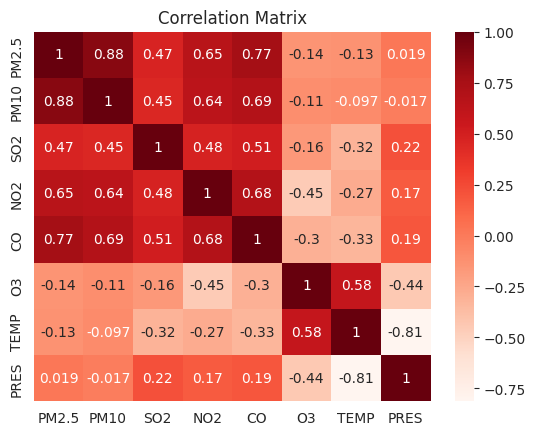

In [13]:
# Create a heatmap of the correlation matrix for 'new_df' using Seaborn
# The color intensity represents the strength and direction of the correlation
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)
plt.title('Correlation Matrix');

**Dalam matriks korelasi ini, dapat diamati hubungan berikut:**

Konsentrasi PM2.5 dan PM10 berkorelasi kuat dengan beberapa parameter polusi udara lainnya.

Gas polutan seperti CO, NO2, dan O3 memiliki korelasi positif yang signifikan.

Suhu (TEMP) dan kelembapan (DEWP) memiliki korelasi
positif lemah.

Tekanan atmosfer (PRES) memiliki korelasi negatif lemah dengan beberapa parameter.

Kelembapan (DEWP) berkorelasi positif lemah dengan curah hujan (RAIN).

### Melakukan analisis lanjutan menggunakan Time series

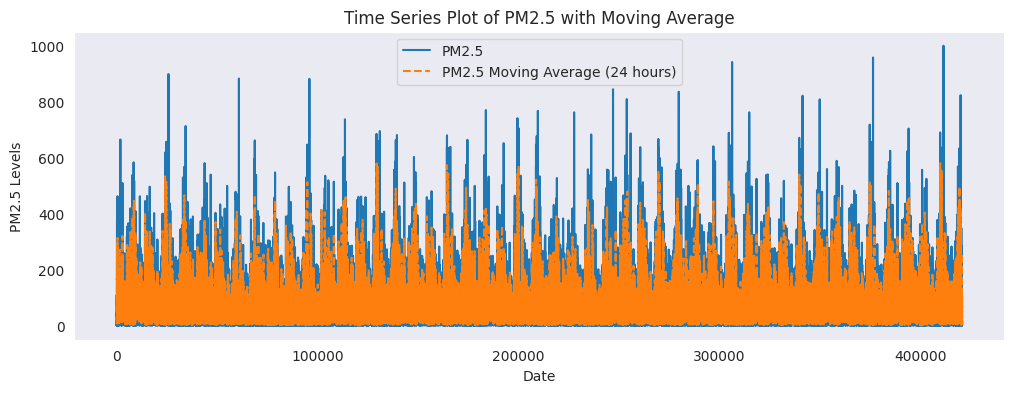

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


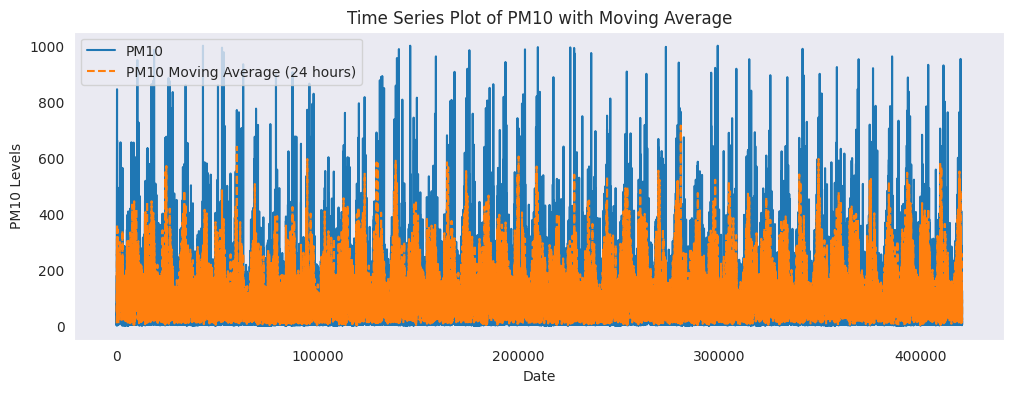

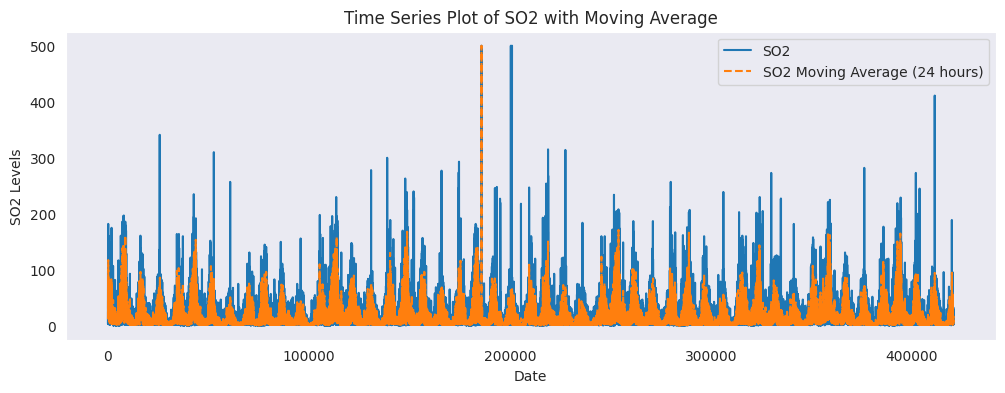

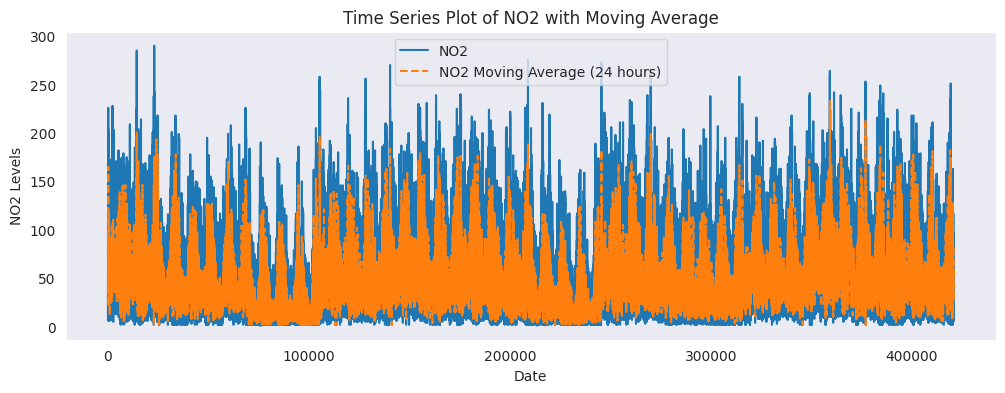

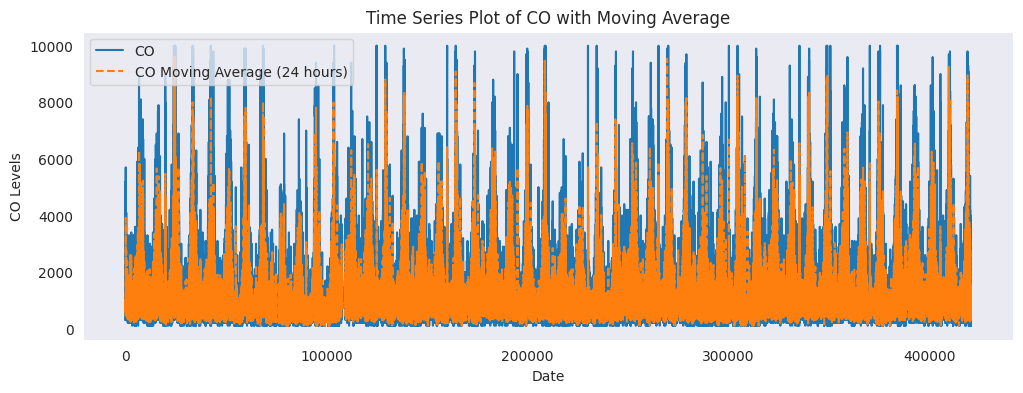

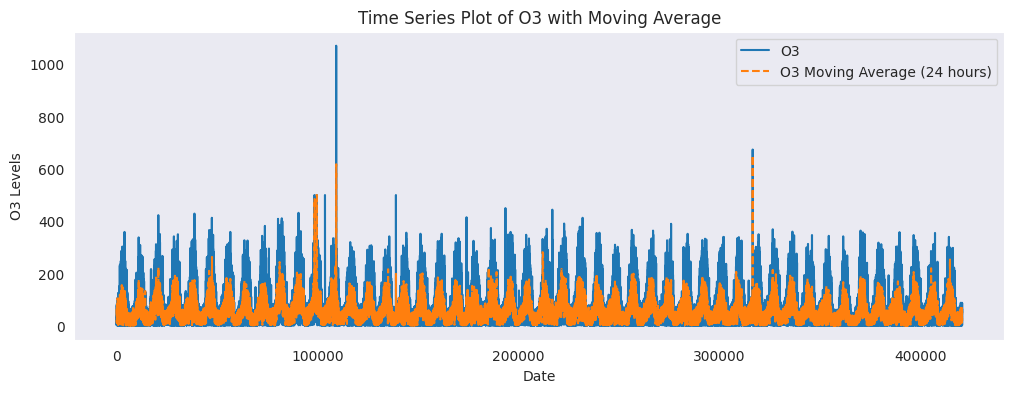

In [14]:
# Salin dataset untuk time series dan moving average
timeseries_df = merged_df.copy()
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
# Penghalusan (Smoothing) dengan Moving Average untuk setiap parameter polusi udara
window_size = 24  # Gunakan moving average dengan jendela 24 jam (harian)
for pollutant in pollutants:
    timeseries_df[f'{pollutant}_MA'] = timeseries_df[pollutant].rolling(window=window_size).mean()

# Plot Time Series Data dan Moving Average untuk setiap parameter polusi udara pada dataset asli
for pollutant in pollutants:
    plt.figure(figsize=(12, 4))
    plt.plot(timeseries_df[pollutant], label=f'{pollutant}')
    plt.plot(timeseries_df[f'{pollutant}_MA'], label=f'{pollutant} Moving Average ({window_size} hours)', linestyle='--')
    plt.title(f'Time Series Plot of {pollutant} with Moving Average')
    plt.xlabel('Date')
    plt.ylabel(f'{pollutant} Levels')
    plt.legend()
    plt.show()


## Visualization & Explanatory Analysis

In [15]:
# Create a new column 'date' in the DataFrame 'imputed_df'
# Combine 'year', 'month', 'day', and 'hour' columns and convert to datetime format
merged_df['date'] = pd.to_datetime(merged_df[['year', 'month', 'day', 'hour']])

In [16]:
# Convert the 'date' column to datetime format using the specified format string
merged_df['date'] = pd.to_datetime(merged_df.date, format ='%Y-%m-%d-%h')
# Set the 'date' column as the index of 'merged_df'
merged_df.set_index('date', inplace =True)

In [17]:
# Return the datetime index of 'merged_df'
merged_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='date', length=420768, freq=None)

In [18]:
merged_df.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
date,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01 01:00:00,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2013-03-01 02:00:00,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2013-03-01 03:00:00,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
2013-03-01 04:00:00,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


### Pertanyaan 1: Bagaimana distribusi konsentrasi polutan PM2.5 pada akhir pekan (weekend) dan hari kerja (weekday)?

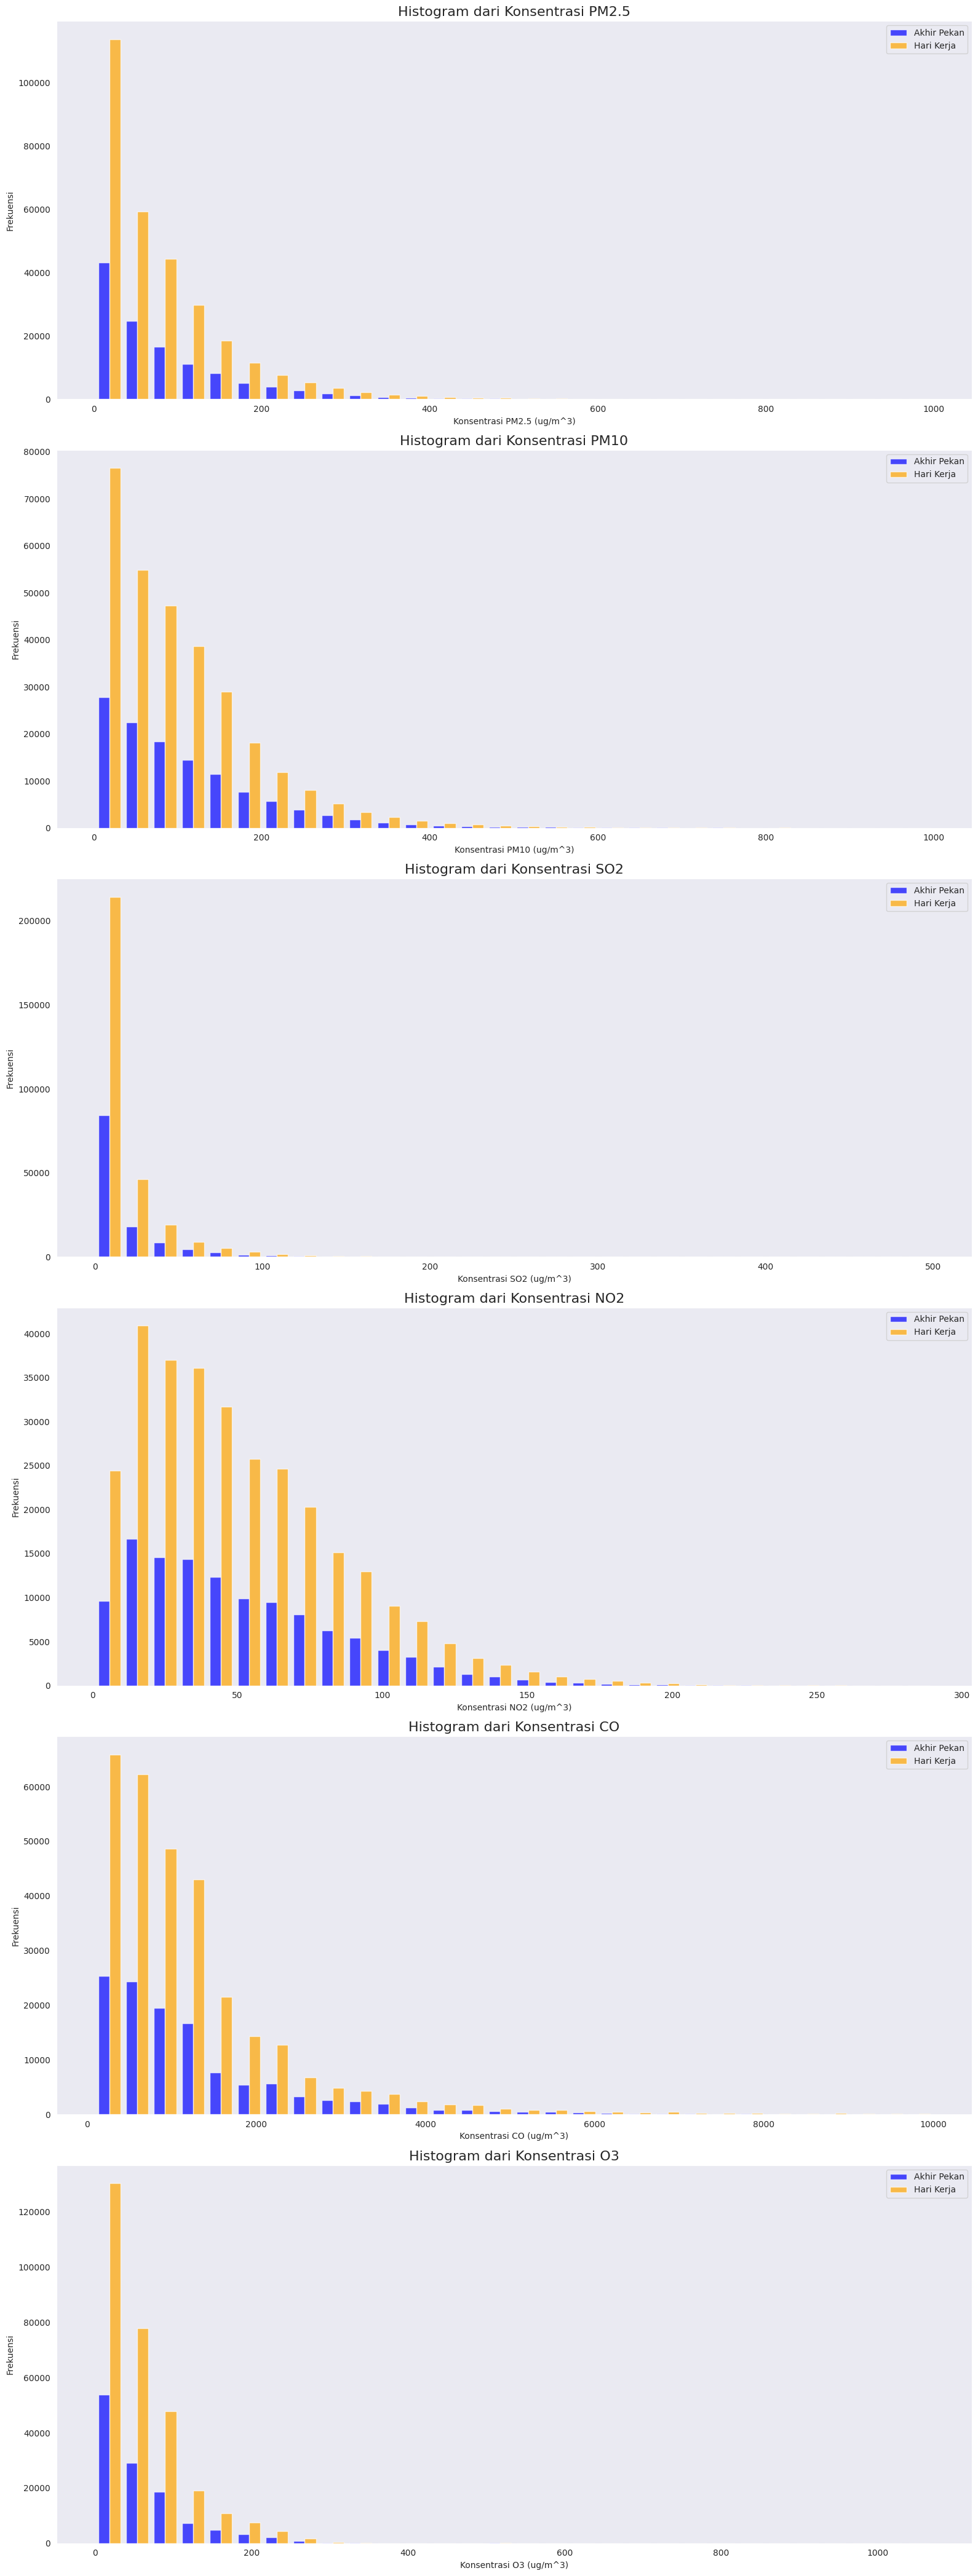

In [19]:
# Pollutants to plot
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Create subplots for each pollutant
fig, axes = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(16, 7 * len(pollutants)))

# Plot histograms for each pollutant
for i, pollutant in enumerate(pollutants):
    ax = axes[i]

    # Extract data for weekdays and weekends
    we = merged_df.loc[merged_df.index.weekday >= 5][pollutant]
    wd = merged_df.loc[merged_df.index.weekday < 5][pollutant]

    # Plot side-by-side bar plots
    # Plot side-by-side bar plots
    ax.hist([we, wd], alpha=0.7, label=['Akhir Pekan', 'Hari Kerja'], color=['blue', 'orange'], bins=30, rwidth=0.8)

    ax.set_title(f'Histogram dari Konsentrasi {pollutant}', fontsize=16)
    ax.set_xlabel(f'Konsentrasi {pollutant} (ug/m^3)')
    ax.set_ylabel('Frekuensi')
    ax.legend()
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana variasi tahunan konsentrasi PM2.5 di berbagai stasiun pengukuran udara?

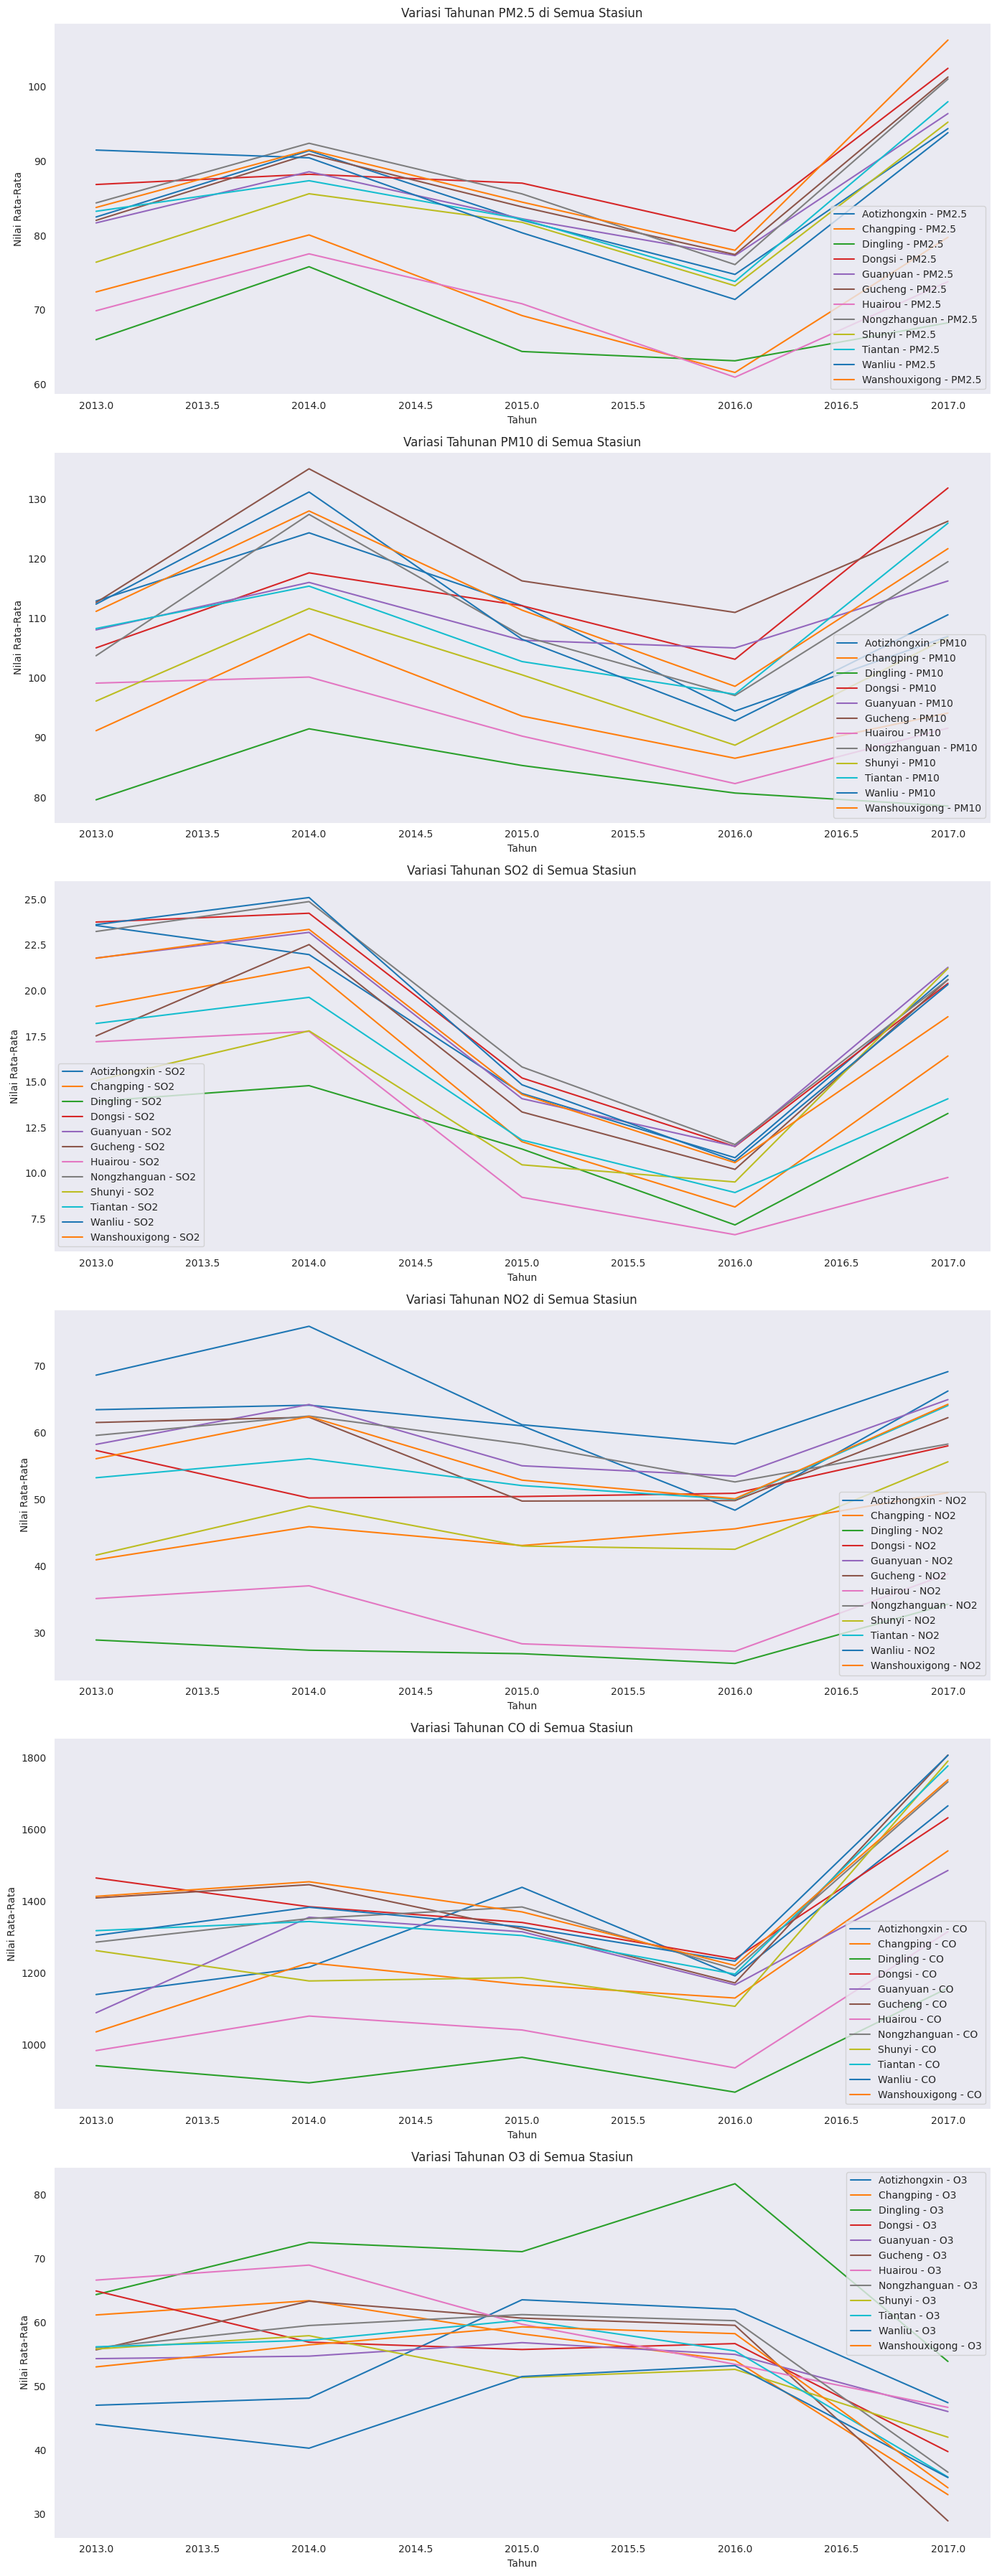

In [20]:
# Agregasi data tahunan di semua stasiun
year_data_all_stations = merged_df.groupby(['station', 'year']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()

# Visualisasi data  tahunan di semua stasiun
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

fig, axes = plt.subplots(nrows=len(pollutants), ncols=1, figsize=(14, 6 * len(pollutants)))

for i, pollutant in enumerate(pollutants):
    for station in merged_df['station'].unique():
        station_data = year_data_all_stations[year_data_all_stations['station'] == station]
        ax = axes[i]
        ax.plot(station_data['year'], station_data[pollutant], label=f"{station} - {pollutant}")

    ax.set_title(f'Variasi Tahunan {pollutant} di Semua Stasiun')
    ax.set_xlabel('Tahun')
    ax.set_ylabel('Nilai Rata-Rata')
    ax.legend()

plt.tight_layout()
plt.show()


### Pertanyaan 3: Berapa nilai tingkat polutan udara tertinggi yang tercatat di seluruh dataset?

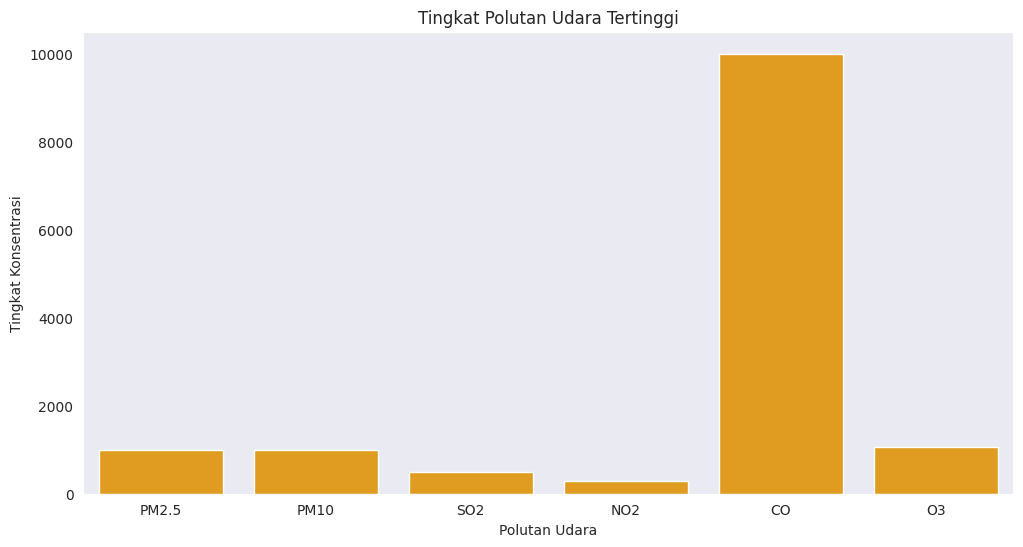

In [21]:
# Filter data untuk mendapatkan nilai tertinggi dari setiap polutan
max_pollutants = merged_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].max()

# Visualisasi nilai tertinggi polutan menggunakan bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=max_pollutants.index, y=max_pollutants.values, color='orange')
plt.title('Tingkat Polutan Udara Tertinggi')
plt.xlabel('Polutan Udara')
plt.ylabel('Tingkat Konsentrasi')
plt.show()


### Pertanyaan 4:
Bagaimana pengaruh faktor lingkungan seperti suhu (TEMP), tekanan udara (PRES), titik embun (DEWP), hujan (RAIN), arah angin (wd), atau kecepatan angin (WSPM) terhadap jumlah konsentrasi PM2.5 di udara di stasiun tertentu?

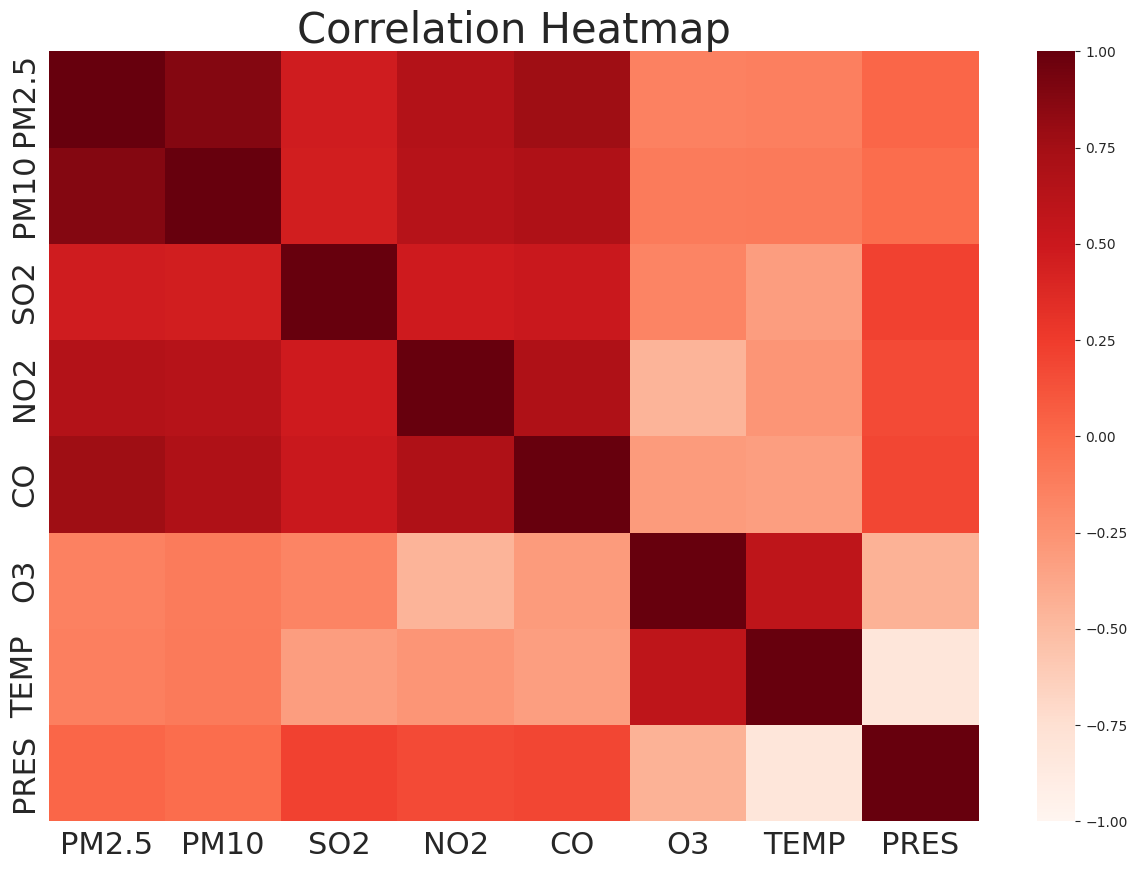

In [22]:
# Tampilan grafik korelasi heatmap dengan cmap 'viridis'
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(correlation_matrix, vmax=1, vmin=-1, center=0, cmap="Reds")
ax.tick_params(labelsize = 22)
ax.set_title("Correlation Heatmap", loc="center", fontsize=30)

plt.show()


In [23]:
def environmental_factors_vs_pollutants_scatter(station, variable, target_pollutant):
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 8))

    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

    for i, pollutant in enumerate(pollutants):
        row, col = divmod(i, 2)
        ax_i = ax[row, col]

        ax_i.scatter(station[variable], station[pollutant], s=5, alpha=0.5, c="#FACE2D", marker='o', edgecolors="#ed7d53")
        ax_i.set_xticklabels([])
        ax_i.set_yticklabels([])
        ax_i.set_xlabel(variable, fontsize=20)
        ax_i.set_ylabel(pollutant, fontsize=20)

    fig.tight_layout(pad=2.0)

    if variable == 'TEMP':
        title = "Suhu"
    elif variable == 'PRES':
        title = "Tekanan"
    elif variable == 'DEWP':
        title = "Titik Embun"
    elif variable == 'RAIN':
        title = "Hujan"
    elif variable == 'wd':
        title = "Arah Angin"
    elif variable == 'WSPM':
        title = "Kecepatan Angin"
    else:
        title = variable  # Use the variable name if not in the predefined variables

    plt.suptitle(f"Tingkat Polusi Udara dengan {title} di {station['station'].iloc[0]}", fontsize=45, y=1.05)
    plt.show()

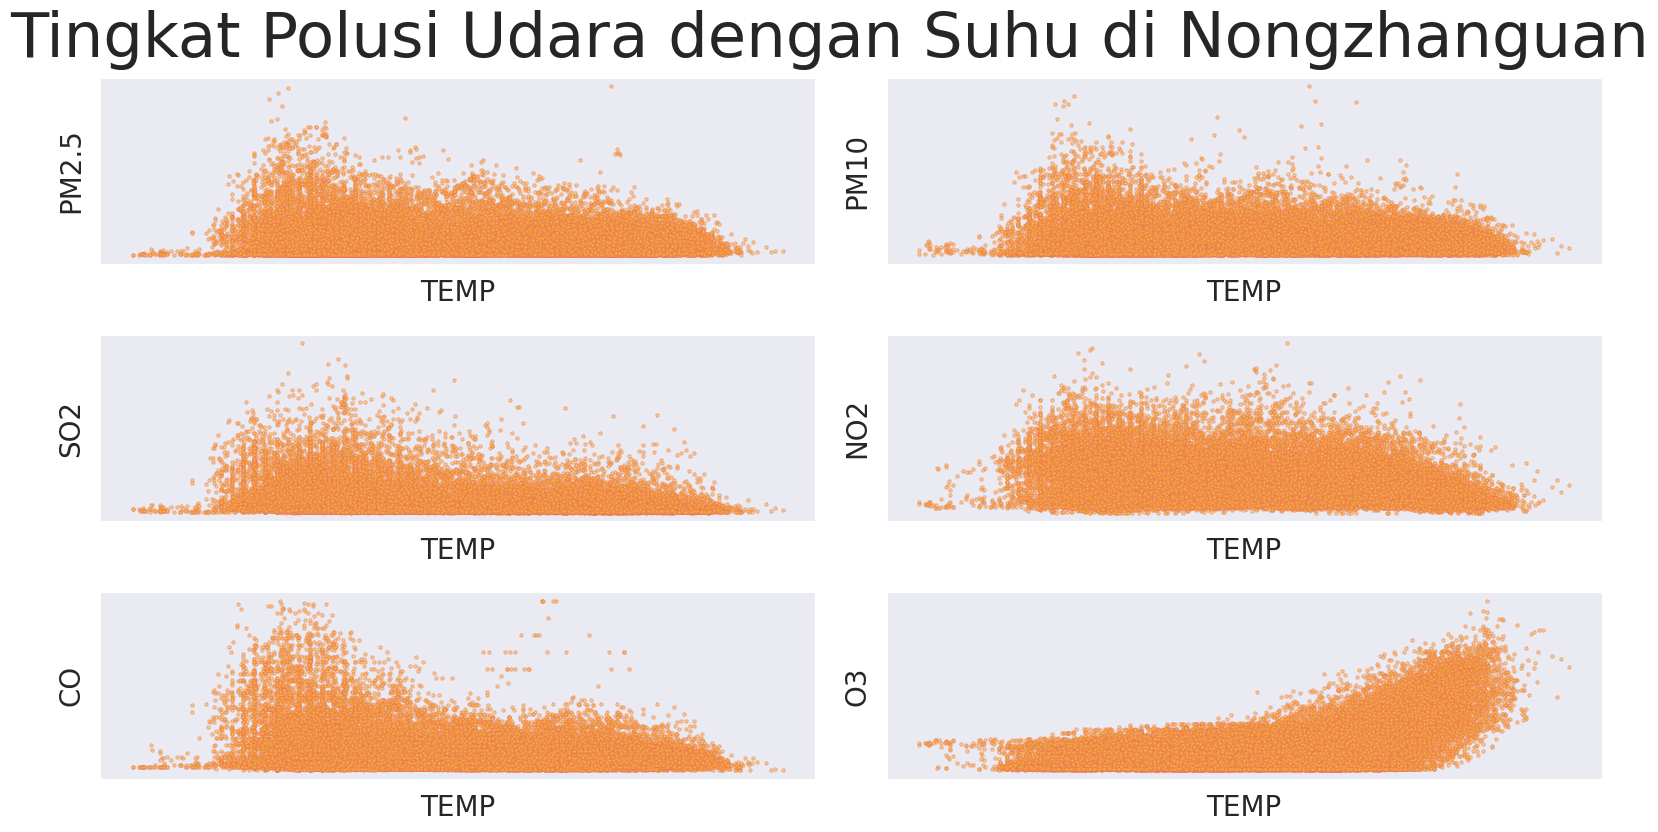

In [24]:
environmental_factors_vs_pollutants_scatter(Nongzhanguan, 'TEMP', 'PM2.5')

## Conclusion

- Berdasarkan analisis histogram, distribusi konsentrasi PM2.5 menunjukkan perbedaan antara hari kerja dan akhir pekan. Konsentrasi cenderung lebih tinggi pada hari kerja.

- Analisis variasi tahunan PM2.5 menunjukkan fluktuasi kompleks dari 2013 hingga 2017. Peningkatan terjadi pada 2013-2014 dan 2016-2017, sedangkan penurunan terlihat pada 2014-2015 dan 2015-2016.

- Berdasarkan urutan konsentrasi tertinggi ke terendah, CO mendominasi, diikuti oleh PM10, PM2.5, O3, SO2, dan NO2.

- Analisis faktor lingkungan menunjukkan bahwa suhu, tekanan udara, dan faktor lainnya tidak memiliki korelasi yang signifikan dengan PM2.5, kecuali korelasi positif yang cukup kuat antara O3 dan suhu.
